<a href="https://colab.research.google.com/github/NousForFreedom/NSL_5/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.layers import Dropout, Dense, BatchNormalization
from keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
# https://woochan-autobiography.tistory.com/882

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # 훈련 이미지 6만, 테스트 이미지 1만

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
def get_preprocessed_data(images, labels):
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형.
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)

    return images, labels

In [ ]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# 원핫 인코딩
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    oh_labels = to_categorical(labels)
    return images, oh_labels

In [ ]:
# 학습/검증/테스트 데이터 세트에 전처리 및 OHE 적용한 뒤 반환
def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021):
    # 학습 및 테스트 데이터 세트를  0 ~ 1사이값 float32로 변경 및 OHE 적용.
    train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)

    # 학습 데이터를 검증 데이터 세트로 다시 분리
    tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)

    return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels )

In [ ]:
# Fashion MNIST 데이터 재 로딩 및 전처리 적용하여 학습/검증/데이터 세트 생성.

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
    get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)
print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(51000, 28, 28) (51000, 10) (9000, 28, 28) (9000, 10) (10000, 28, 28) (10000,)


In [ ]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPooling2D(2)(x)

# 3차원으로 되어있는 Feature map 결과를 Fully Connected 연결하기 위해서는 Flatten()을 적용.
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 100)               1081700   
                                                             

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels))

Epoch 1/30
399/399 [==============================] - 151s 376ms/step - loss: 0.4417 - accuracy: 0.8437 - val_loss: 0.3334 - val_accuracy: 0.8806
Epoch 2/30
399/399 [==============================] - 128s 321ms/step - loss: 0.2743 - accuracy: 0.9018 - val_loss: 0.2702 - val_accuracy: 0.9026
Epoch 3/30
399/399 [==============================] - 125s 314ms/step - loss: 0.2208 - accuracy: 0.9198 - val_loss: 0.2643 - val_accuracy: 0.9049
Epoch 4/30
399/399 [==============================] - 125s 315ms/step - loss: 0.1830 - accuracy: 0.9337 - val_loss: 0.2371 - val_accuracy: 0.9150
Epoch 5/30
399/399 [==============================] - 125s 314ms/step - loss: 0.1517 - accuracy: 0.9453 - val_loss: 0.2310 - val_accuracy: 0.9197
Epoch 6/30
399/399 [==============================] - 126s 315ms/step - loss: 0.1245 - accuracy: 0.9534 - val_loss: 0.2174 - val_accuracy: 0.9284
Epoch 7/30
399/399 [==============================] - 130s 326ms/step - loss: 0.1020 - accuracy: 0.9627 - val_loss: 0.2354 -

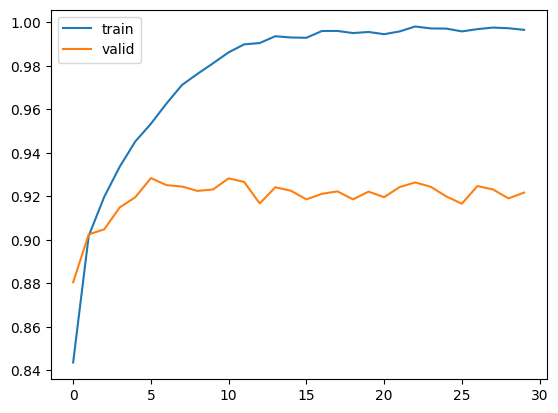

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
%matplotlib inline

def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()

show_history(history)

In [ ]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

40/40 [==============================] - 10s 253ms/step - loss: 0.5753 - accuracy: 0.9195


[0.5753024220466614, 0.9194999933242798]

In [ ]:


def create_model():
    input_tensor = Input(shape=(28, 28, 1))
    x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
    x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
    x = MaxPooling2D(2)(x)

    x = Dropout(rate=0.5)(x)
    x = Flatten()(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(200, activation='relu')(x)
    x = Dropout(rate=0.2)(x)
    output = Dense(10, activation='softmax')(x)
    model = Model(inputs=input_tensor, outputs=output)
    model.summary()

    return model

model = create_model()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                           

In [ ]:
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels))

Epoch 1/30
399/399 [==============================] - 149s 370ms/step - loss: 0.4970 - accuracy: 0.8195 - val_loss: 0.3356 - val_accuracy: 0.8817
Epoch 2/30
399/399 [==============================] - 147s 368ms/step - loss: 0.3425 - accuracy: 0.8744 - val_loss: 0.2801 - val_accuracy: 0.8961
Epoch 3/30
399/399 [==============================] - 143s 360ms/step - loss: 0.2951 - accuracy: 0.8908 - val_loss: 0.2623 - val_accuracy: 0.9050
Epoch 4/30
399/399 [==============================] - 152s 382ms/step - loss: 0.2708 - accuracy: 0.9006 - val_loss: 0.2524 - val_accuracy: 0.9078
Epoch 5/30
399/399 [==============================] - 143s 359ms/step - loss: 0.2457 - accuracy: 0.9083 - val_loss: 0.2247 - val_accuracy: 0.9167
Epoch 6/30
399/399 [==============================] - 143s 357ms/step - loss: 0.2305 - accuracy: 0.9143 - val_loss: 0.2175 - val_accuracy: 0.9184
Epoch 7/30
399/399 [==============================] - 142s 355ms/step - loss: 0.2177 - accuracy: 0.9193 - val_loss: 0.2109 -

40/40 [==============================] - 8s 196ms/step - loss: 0.2112 - accuracy: 0.9311


[0.21123744547367096, 0.9311000108718872]

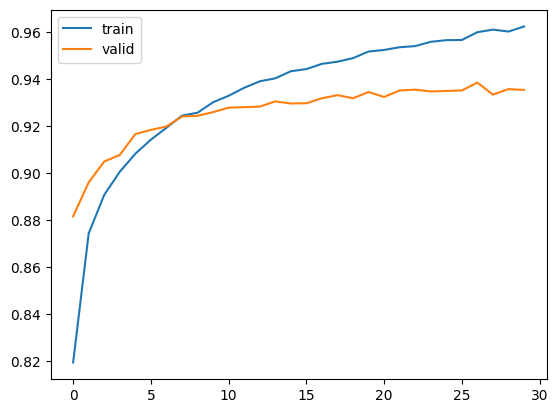

In [ ]:
show_history(history)
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

In [ ]:
#DNN

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(tr_images, tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels))


Epoch 1/30
399/399 [==============================] - 8s 19ms/step - loss: 0.8768 - accuracy: 0.6709 - val_loss: 0.5074 - val_accuracy: 0.8192
Epoch 2/30
399/399 [==============================] - 6s 14ms/step - loss: 0.5562 - accuracy: 0.8055 - val_loss: 0.4406 - val_accuracy: 0.8383
Epoch 3/30
399/399 [==============================] - 7s 18ms/step - loss: 0.5068 - accuracy: 0.8218 - val_loss: 0.4246 - val_accuracy: 0.8470
Epoch 4/30
399/399 [==============================] - 6s 15ms/step - loss: 0.4742 - accuracy: 0.8319 - val_loss: 0.3927 - val_accuracy: 0.8519
Epoch 5/30
399/399 [==============================] - 7s 17ms/step - loss: 0.4514 - accuracy: 0.8395 - val_loss: 0.3934 - val_accuracy: 0.8579
Epoch 6/30
399/399 [==============================] - 6s 15ms/step - loss: 0.4365 - accuracy: 0.8459 - val_loss: 0.3705 - val_accuracy: 0.8662
Epoch 7/30
399/399 [==============================] - 6s 15ms/step - loss: 0.4241 - accuracy: 0.8513 - val_loss: 0.3818 - val_accuracy: 0.8591

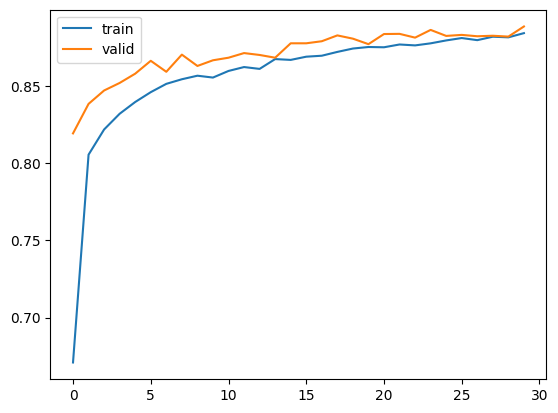

In [ ]:
# 학습 및 검증 정확도 시각화
def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    plt.show()

show_history(history)


In [ ]:
# 모델 성능 평가
test_loss, test_accuracy = model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)
print(f"Test accuracy: {test_accuracy}")

40/40 [==============================] - 0s 7ms/step - loss: 0.3350 - accuracy: 0.8827
Test accuracy: 0.8827000260353088
